In [76]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Cars.csv')

In [3]:
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [4]:
features = ['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders' ,
            'Transmission Type', 'Vehicle Style', 'highway MPG',
            'city mpg','MSRP']

In [5]:
df = df[features]

In [6]:
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Vehicle Style,Coupe,Convertible,Coupe,Coupe,Convertible
highway MPG,26,28,28,28,28
city mpg,19,19,20,18,18
MSRP,46135,40650,36350,29450,34500


### Data Preparation

* Replace blank spaces with "_" on columns names

In [7]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

* Fill in the missing values of the selected features with 0.

In [8]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [9]:
df = df.fillna(0)

In [10]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

* Rename MSRP variable to price

In [11]:
df = df.rename( columns = {'msrp':'price'})

In [12]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`

In [13]:
df.transmission_type.value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

**Answer:** AUTOMATIC

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`

In [14]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [15]:
numeric = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg',
           'city_mpg', 'price']

In [16]:
correlation_matrix = df[numeric].corr()

print(correlation_matrix)

                      year  engine_hp  engine_cylinders  highway_mpg  \
year              1.000000   0.338714         -0.040708     0.258240   
engine_hp         0.338714   1.000000          0.774851    -0.415707   
engine_cylinders -0.040708   0.774851          1.000000    -0.614541   
highway_mpg       0.258240  -0.415707         -0.614541     1.000000   
city_mpg          0.198171  -0.424918         -0.587306     0.886829   
price             0.227590   0.650095          0.526274    -0.160043   

                  city_mpg     price  
year              0.198171  0.227590  
engine_hp        -0.424918  0.650095  
engine_cylinders -0.587306  0.526274  
highway_mpg       0.886829 -0.160043  
city_mpg          1.000000 -0.157676  
price            -0.157676  1.000000  


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

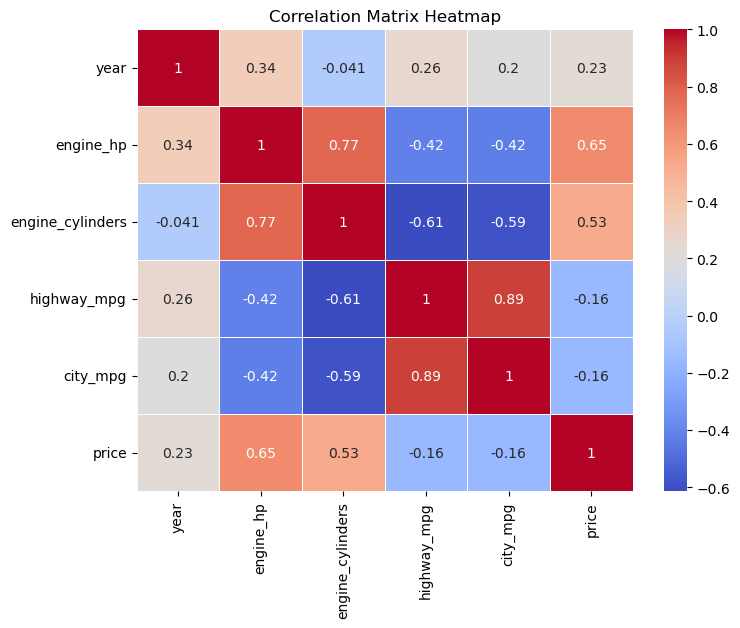

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Answer:** highway_mpg and city_mpg

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.


To achieve this we will use one-hot encoding

In [19]:
mean_price = df['price'].mean()

In [20]:
df['above_average'] = df['price'].apply(lambda x: 1 if x > mean_price else 0)
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`price`) is not in your dataframe.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df_full_train, df_test = train_test_split (df, test_size = 0.2, random_state = 42)

In [23]:
df_train, df_val = train_test_split (df_full_train, test_size = 0.25, random_state = 42)

In [24]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [25]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [26]:
y_train = df_train['above_average']
y_val = df_val['above_average']
y_test = df_test['above_average']

In [27]:
# This will prepare some data for q6
y_train_q6 = np.log1p(df_train['price'])
y_val_q6 = np.log1p(df_val['price'])
y_test_q6 = np.log1p(df_test['price'])

In [28]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']
del df_train['price']
del df_val['price']
del df_test['price']

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`

In [29]:
from sklearn.metrics import mutual_info_score

In [30]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
dtype: object

In [31]:
df_train.head().T

,0,1,2,3,4
make,Mitsubishi,Kia,Lamborghini,Chevrolet,Pontiac
model,Endeavor,Borrego,Gallardo,Colorado,Vibe
year,2011,2009,2012,2016,2009
engine_hp,225.0,276.0,570.0,200.0,158.0
engine_cylinders,6.0,6.0,10.0,4.0,4.0
transmission_type,AUTOMATIC,AUTOMATIC,MANUAL,AUTOMATIC,AUTOMATIC
vehicle_style,4dr SUV,4dr SUV,Convertible,Crew Cab Pickup,4dr Hatchback
highway_mpg,19,21,20,27,26
city_mpg,15,17,12,20,20


In [32]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [33]:
for c in categorical:
    print(c)
    print(round(mutual_info_score(df.above_average, df[c]),2))

make
0.24
model
0.46
transmission_type
0.02
vehicle_style
0.08


**Answer:** transmission_type

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

In [34]:
from sklearn.feature_extraction import DictVectorizer

In [35]:
# First step is to convert the dataframe into a dictionary
train_dicts = df_train.to_dict(orient = 'records')

In [36]:
# Open DictVectorizer instance
dv = DictVectorizer(sparse = False)

In [37]:
train_dicts[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'highway_mpg': 19,
 'city_mpg': 15}

In [38]:
X_train = dv.fit_transform(train_dicts)
X_train

array([[1.500e+01, 6.000e+00, 2.250e+02, ..., 0.000e+00, 0.000e+00,
        2.011e+03],
       [1.700e+01, 6.000e+00, 2.760e+02, ..., 0.000e+00, 0.000e+00,
        2.009e+03],
       [1.200e+01, 1.000e+01, 5.700e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       ...,
       [1.700e+01, 6.000e+00, 2.600e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [1.900e+01, 4.000e+00, 1.360e+02, ..., 0.000e+00, 0.000e+00,
        1.993e+03],
       [1.700e+01, 6.000e+00, 3.650e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

In [39]:
val_dicts = df_val.to_dict(orient = 'records')

In [40]:
# We do not fit with validation data
X_val = dv.transform(val_dicts)

In [41]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [44]:
len(y_train)

7148

In [45]:
len(X_train)

7148

In [46]:
X_train

array([[1.500e+01, 6.000e+00, 2.250e+02, ..., 0.000e+00, 0.000e+00,
        2.011e+03],
       [1.700e+01, 6.000e+00, 2.760e+02, ..., 0.000e+00, 0.000e+00,
        2.009e+03],
       [1.200e+01, 1.000e+01, 5.700e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       ...,
       [1.700e+01, 6.000e+00, 2.600e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [1.900e+01, 4.000e+00, 1.360e+02, ..., 0.000e+00, 0.000e+00,
        1.993e+03],
       [1.700e+01, 6.000e+00, 3.650e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

In [47]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [48]:
model.intercept_[0]

-0.5493086897262572

In [49]:
model.predict_proba(X_train)

array([[9.93143222e-01, 6.85677765e-03],
       [9.71437879e-01, 2.85621208e-02],
       [3.48273135e-05, 9.99965173e-01],
       ...,
       [9.81545829e-01, 1.84541710e-02],
       [9.99994994e-01, 5.00617158e-06],
       [7.22880459e-01, 2.77119541e-01]])

In [50]:
y_pred = model.predict_proba(X_val)[:,1]

In [51]:
decision = (y_pred >= 0.5)

In [52]:
round((y_val == decision).mean(),2)

0.95

**Answer:** 0.95

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive

In [53]:
q5_features = ['year','engine_hp','transmission_type','city_mpg']

In [54]:
model_q5 = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [55]:
df_train_q5 = df_train[q5_features]
df_val_q5 = df_val[q5_features]

In [56]:
train_dicts_q5 = df_train_q5.to_dict(orient = 'records')

In [57]:
dv_q5 = DictVectorizer(sparse = False)

In [58]:
X_train_q5 = dv_q5.fit_transform(train_dicts_q5)
X_train

array([[1.500e+01, 6.000e+00, 2.250e+02, ..., 0.000e+00, 0.000e+00,
        2.011e+03],
       [1.700e+01, 6.000e+00, 2.760e+02, ..., 0.000e+00, 0.000e+00,
        2.009e+03],
       [1.200e+01, 1.000e+01, 5.700e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       ...,
       [1.700e+01, 6.000e+00, 2.600e+02, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [1.900e+01, 4.000e+00, 1.360e+02, ..., 0.000e+00, 0.000e+00,
        1.993e+03],
       [1.700e+01, 6.000e+00, 3.650e+02, ..., 1.000e+00, 0.000e+00,
        2.015e+03]])

In [59]:
val_dicts_q5 = df_val_q5.to_dict(orient = 'records')

In [60]:
X_val_q5 = dv_q5.transform(val_dicts_q5)

In [61]:
model_q5.fit(X_train_q5, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [62]:
y_pred_q5 = model_q5.predict_proba(X_val_q5)[:,1]

In [63]:
decision_q5 = (y_pred_q5 >= 0.5)

In [64]:
original_accurary = round((y_val == decision_q5).mean(),2)
original_accurary

0.89

In [65]:
print(df_train_q5)

      year  engine_hp transmission_type  city_mpg
0     2011      225.0         AUTOMATIC        15
1     2009      276.0         AUTOMATIC        17
2     2012      570.0            MANUAL        12
3     2016      200.0         AUTOMATIC        20
4     2009      158.0         AUTOMATIC        20
...    ...        ...               ...       ...
7143  2016      266.0         AUTOMATIC        18
7144  2009      260.0            MANUAL        21
7145  2012      260.0         AUTOMATIC        17
7146  1993      136.0            MANUAL        19
7147  2015      365.0         AUTOMATIC        17

[7148 rows x 4 columns]


In [66]:
for c in q5_features:
    print(c)
    df_train_q5_copy = df_train_q5.copy()
    df_train_q5_copy = df_train_q5_copy.drop(c, axis =1)
    train_dicts_q5 = df_train_q5_copy.to_dict(orient = 'records')
    dv_q5 = DictVectorizer(sparse = False)
    X_train_q5 = dv_q5.fit_transform(train_dicts_q5)
    val_dicts_q5 = df_val_q5.to_dict(orient = 'records')
    X_val_q5 = dv_q5.transform(val_dicts_q5)
    model_q5.fit(X_train_q5, y_train)
    y_pred_q5 = model_q5.predict_proba(X_val_q5)[:,1]
    decision_q5 = (y_pred_q5 >= 0.5)
    loop_accuracy = (y_val == decision_q5).mean()
    print(loop_accuracy)
    difference = original_accurary - loop_accuracy
    print("Difference:", difference)
    print()

year
0.8854385228703315
Difference: 0.004561477129668479

engine_hp
0.7444397817876626
Difference: 0.14556021821233744

transmission_type
0.8820814099874108
Difference: 0.00791859001258921

city_mpg
0.8766261015526647
Difference: 0.013373898447335275



**Answer:** year

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.

In [67]:
price_logs = np.log1p(df['price'])


In [68]:
from sklearn.linear_model import Ridge

In [82]:
alpha = [0, 0.01, 0.1, 1, 10]
for a in alpha:
    print('Alpha: ', a)
    linear_model = Ridge(solver = 'sag', random_state=42, alpha=a, max_iter=1000)
    linear_model.fit(X_train, y_train_q6)
    y_pred_q6 = linear_model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred_q6))
    print('Score: ', score)

Alpha:  0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Score:  9.861797765785957
Alpha:  0.01


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Score:  9.86179777909085
Alpha:  0.1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Score:  9.861797898832084
Alpha:  1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Score:  9.861799095988058
Alpha:  10
Score:  9.861811042029679


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Answer:** 0 (they are all the same)